# Preprocesssing and Linear Assumptions 

In [1]:
import os
import sys
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2
%matplotlib inline 

# Setting up directories
ROOT_DIR = os.path.join(os.getcwd(), '..')
SRC_DIR = os.path.join(os.getcwd(), '..', 'src')
DATA_DIR = os.path.join(ROOT_DIR, "data")

sys.path.append(ROOT_DIR)
sys.path.append(SRC_DIR)
os.chdir(ROOT_DIR)

In [2]:
# Custom Modules
from d00_utils import read_write

INTER_DATA_DIR = os.path.join(DATA_DIR,"02_intermediate")
LISTINGS_DATA_PATH = os.path.join(INTER_DATA_DIR, 'listings_interm_with_zips_2.csv')

## Sneak peek the data

In [3]:
listings = pd.read_csv(LISTINGS_DATA_PATH)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           6885 non-null   object 
 1   address       6885 non-null   object 
 2   neighborhood  6885 non-null   object 
 3   rent          6885 non-null   int64  
 4   beds          6885 non-null   int64  
 5   baths         6885 non-null   float64
 6   flexs         6885 non-null   float64
 7   zip           6885 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 430.4+ KB


In [4]:
listings.head(3)

,url,address,neighborhood,rent,beds,baths,flexs,zip
0,https://www.renthop.com/listings/626-1st-avenu...,"626 1st Avenue, Apt W17M","Murray Hill, Midtown Manhattan, Manhattan",3408,0,1.0,0.0,10016
1,https://www.renthop.com/listings/20-exchange-p...,"20 Exchange Place, Apt 2601","Financial District, Downtown Manhattan, Manhattan",3673,1,1.0,0.0,10005
2,https://www.renthop.com/listings/8-av-43rd-st/...,8 Av /43rd st,"Hell's Kitchen, Midtown Manhattan, Manhattan",3650,1,1.0,2.0,10036


## Linear Model Assumptions

#### 1. Linearity of the relationship between dependent and independent variables

As all the feature we are categorical. Including zip code, as it can't be aggregate to add any useful value. Hence, we can proceed.

In [13]:
from pyper import *
R_PATH = "C:/Program Files/R/R-3.6.2/bin/R.exe"
r = R(RCMD=R_PATH, use_numpy=True, use_pandas=True)

In [18]:
_ = r("lmod =<-lm(rent~., %s))" % Str4R(listings))

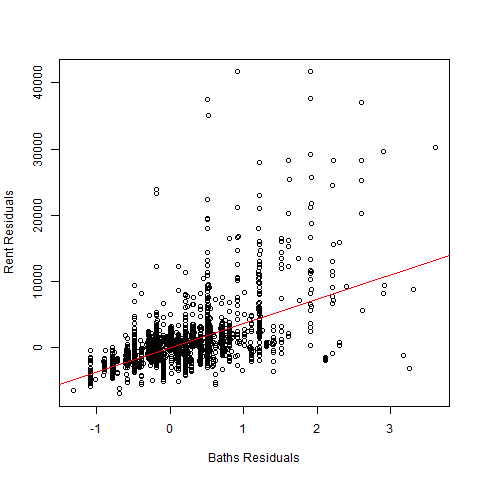

In [19]:
r("d = residuals(lm(rent~beds +  flexs + zip, %s))" % Str4R(listings))
r("m = residuals(lm(baths~beds +  flexs + zip, %s))" % Str4R(listings))

r("png('test.png')")
r("plot(m,d, xlab=\"Baths Residuals\", ylab=\"Rent Residuals\")")
r("abline(0,coef(lmod)['baths'])")
r("abline(lm(d~m),col=2)")
r("dev.off()")

from IPython.display import Image
Image("test.png",width=600,height=400)

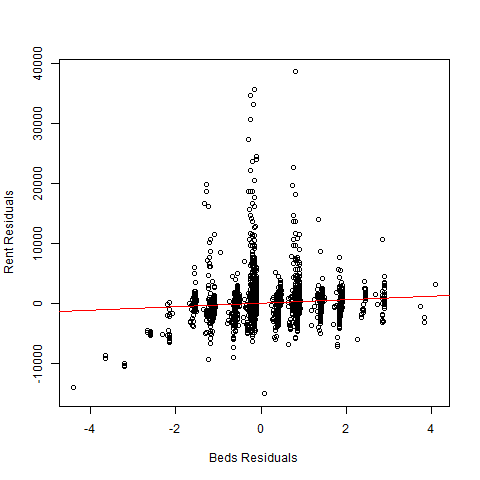

In [38]:
r("d = residuals(lm(rent~baths +  flexs + zip, %s))" % Str4R(listings))
r("m = residuals(lm(beds~baths +  flexs + zip, %s))" % Str4R(listings))

r("png('test.png')")
r("plot(m,d, xlab=\"Beds Residuals\", ylab=\"Rent Residuals\")")
r("abline(0,coef(lmod)['beds'])")
r("abline(lm(d~m),col=2)")
r("dev.off()")

from IPython.display import Image
Image("test.png",width=600,height=400)

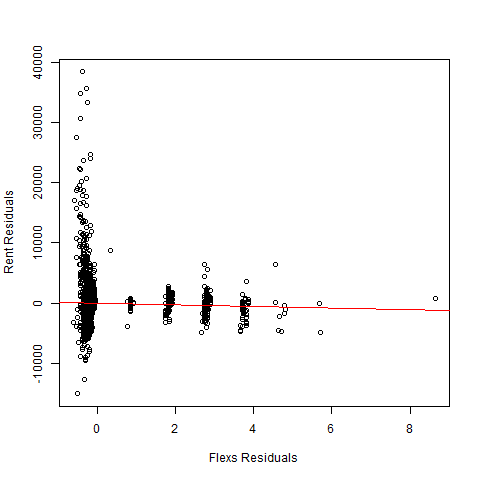

In [40]:
r("d = residuals(lm(rent~baths +  beds + zip, %s))" % Str4R(listings))
r("m = residuals(lm(flexs~baths +  beds + zip, %s))" % Str4R(listings))

r("png('test.png')")
r("plot(m,d, xlab=\"Flexs Residuals\", ylab=\"Rent Residuals\")")
r("abline(lm(d~m),col=2)")
r("dev.off()")

from IPython.display import Image
Image("test.png",width=600,height=400)

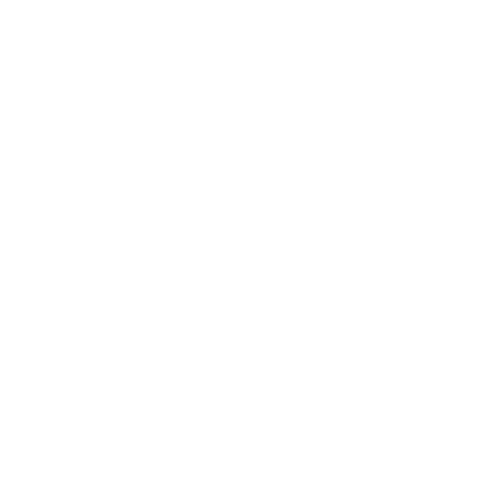

In [51]:
r("d = residuals(lm(rent~baths +  flexs + beds, %s))" % Str4R(listings))
r("m = residuals(lm(factor(zip)~baths +  flexs + beds, %s))" % Str4R(listings))

r("png('test.png')")
r("plot(m,d, xlab=\"zip Residuals\", ylab=\"Rent Residuals\")")
r("abline(lm(d~m),col=2)")
r("dev.off()")

from IPython.display import Image
Image("test.png",width=600,height=400)

In [ ]:
listings.columns

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("rent", "baths", [ 'beds', 'flexs','zip'], data=listings, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("rent", 'beds', [ "baths", 'flexs','zip'], data=listings, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("rent",  'zip', [ 'beds', "baths", 'flexs'], data=listings, ax=ax)

In [ ]:
plt.plot(listings['baths'], listings['rent'], 'o', color='black');
plt.title("Linear Relationship Exists")

In [ ]:
plt.plot(listings['flexs'], listings['rent'], 'o', color='black');
plt.title("Linear Relationship Exists")

#### 2. Normality of Errors

Normality is Assumed using Big Sample, Following Centeral Limit Theorem.

#### 3. Multicolinerality

As all the feature we have are categorical. Hence, we can proceed. 
However, we have to drop one of the categories from each feature's categories to avoid multicolinearity.

## Scaling Data

Categorical features has no need for scaling.

## Saving Data

In [ ]:
read_write.create_data_sub_dir('03_preprocessed')
read_write.save_data_file('03_preprocessed','listings_preprocessed_2.csv',listings)

#### End